In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [4]:
dataset = "../../datasets/airbnb_nyc/AB_NYC_2019.csv"

In [5]:
# read the data
nyc_df = pd.read_csv(dataset)
nyc_df.head(10)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129
6,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,45,49,2017-10-05,0.40,1,0
7,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79,2,430,2019-06-24,3.47,1,220
8,5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side,40.80178,-73.96723,Private room,79,2,118,2017-07-21,0.99,1,0
9,5238,Cute & Cozy Lower East Side 1 bdrm,7549,Ben,Manhattan,Chinatown,40.71344,-73.99037,Entire home/apt,150,1,160,2019-06-09,1.33,4,188


In [424]:
nyc_df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


#### EDA

In [425]:
nyc_df.price[nyc_df.price >= 2000].count()

110

#### Highlights 

- The count of observations where price goes above 2000 is 110 which mean less than 0.05% of the total amount of records. 
- The plot shows a long tail with mean around 150~

<AxesSubplot:xlabel='price', ylabel='Count'>

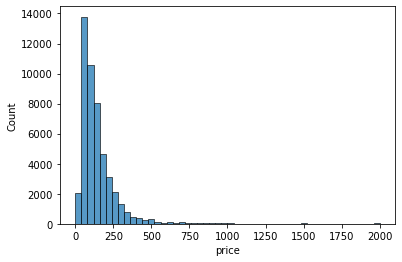

In [426]:
# plot the price data 
sns.histplot(nyc_df.price[nyc_df.price <= 2000], bins=50)

In [427]:
# Grab features
target = 'price'
features = ['latitude', 'longitude', 'price','minimum_nights','number_of_reviews',
            'reviews_per_month','calculated_host_listings_count','availability_365']

In [428]:
# Select the features
data = nyc_df[features]
data.head()

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,40.64749,-73.97237,149,1,9,0.21,6,365
1,40.75362,-73.98377,225,1,45,0.38,2,355
2,40.80902,-73.94190,150,3,0,NaN,1,365
3,40.68514,-73.95976,89,1,270,4.64,1,194
4,40.79851,-73.94399,80,10,9,0.10,1,0


## Question 1

Find a feature with missing values. How many missing values does it have?

- reviews_per_month has 10.052 missing values

In [429]:
data.isnull().sum()

latitude                              0
longitude                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

## Question 2

What's the median (50% percentile) for variable 'minimum_nights'?

- The 50% percentile is 3

In [430]:
data.minimum_nights.describe()

count    48895.000000
mean         7.029962
std         20.510550
min          1.000000
25%          1.000000
50%          3.000000
75%          5.000000
max       1250.000000
Name: minimum_nights, dtype: float64

### Split the data

- Shuffle the initial dataset, use seed 42.
- Split your data in train/val/test sets, with 60%/20%/20% distribution.
- Make sure that the target value ('price') is not in your dataframe.
- Apply the log transformation to the price variable using the np.log1p() function.

In [431]:
def split_data(data,seed):
    seed=seed
    data_size = len(data)
    
    test_data_size, val_data_size = int(data_size * .20), int(data_size * .20)
    train_data_size = data_size - test_data_size - val_data_size
    
    # get indices 
    idx = np.arange(data_size)
    # set the seed
    np.random.seed(seed)
    # shuffle the indices
    np.random.shuffle(idx)
    
    # Split the dataset
    train_data = data.iloc[idx[:train_data_size]]
    test_data = data.iloc[idx[train_data_size:train_data_size+test_data_size]]
    val_data = data.iloc[idx[train_data_size+test_data_size:]]
    
    # Reset the index
    train_data.reset_index(drop=True, inplace=True)
    test_data.reset_index(drop=True, inplace=True)
    val_data.reset_index(drop=True, inplace=True)
    
    return train_data, test_data,val_data

In [432]:
# Split the dataset
train_data, test_data, val_data = split_data(data,42)

In [433]:
print(f"Training set size:{len(train_data)}")
print(f"Test set size:{len(test_data)}")
print(f"Validation set size:{len(val_data)}")

Training set size:29337
Test set size:9779
Validation set size:9779


In [434]:
# Applying log1p to Price variable
train_target = np.log1p(train_data.price.values)
test_target = np.log1p(test_data.price.values)
val_target = np.log1p(val_data.price.values)

# Drop the target column
train_data = train_data.drop(columns=[target], axis=1)
test_data = test_data.drop(columns=[target], axis=1)
val_data = val_data.drop(columns=[target], axis=1)

In [436]:
train_data.columns

Index(['latitude', 'longitude', 'minimum_nights', 'number_of_reviews',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

## Question 3

- We need to deal with missing values for the column from Q1.
- We have two options: fill it with 0 or with the mean of this variable.
- Try both options. For each, train a linear regression model without regularization using the code from the lessons.
- For computing the mean, use the training only!
- Use the validation dataset to evaluate the models and compare the RMSE of each option.
- Round the RMSE scores to 2 decimal digits using round(score, 2)
- Which option gives better RMSE?

In [437]:
# Fill training with Zero
train_zeros = train_data.copy()
print(train_zeros.isnull().sum())
train_zeros[['reviews_per_month']] = train_zeros[['reviews_per_month']].fillna(value=0)

latitude                             0
longitude                            0
minimum_nights                       0
number_of_reviews                    0
reviews_per_month                 5998
calculated_host_listings_count       0
availability_365                     0
dtype: int64


In [438]:
train_zeros.isnull().sum()

latitude                          0
longitude                         0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [439]:
# Fill training with mean
train_mean = train_data.copy()
print(train_mean.isnull().sum())
train_mean[['reviews_per_month']] = train_mean[['reviews_per_month']].fillna(value=train_data.reviews_per_month.mean())

latitude                             0
longitude                            0
minimum_nights                       0
number_of_reviews                    0
reviews_per_month                 5998
calculated_host_listings_count       0
availability_365                     0
dtype: int64


In [440]:
train_mean.isnull().sum()

latitude                          0
longitude                         0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [441]:
train_mean.reviews_per_month.head(15)

0     0.710000
1     1.368549
2     0.430000
3     1.880000
4     0.800000
5     3.050000
6     0.060000
7     1.368549
8     1.940000
9     2.630000
10    2.110000
11    1.368549
12    0.210000
13    0.050000
14    0.210000
Name: reviews_per_month, dtype: float64

In [442]:
train_zeros.reviews_per_month.head(15)

0     0.71
1     0.00
2     0.43
3     1.88
4     0.80
5     3.05
6     0.06
7     0.00
8     1.94
9     2.63
10    2.11
11    0.00
12    0.21
13    0.05
14    0.21
Name: reviews_per_month, dtype: float64

In [443]:
# Linear Regression
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [444]:
# Perform training and get predictions
def fit_and_get_preds(X, y, X_val):
    w0, w = train_linear_regression(X, y)
    return w0 + X_val.dot(w)

In [445]:
def rmse(y, y_pred):
    se = (y - y_pred) ** 2
    mse = se.mean()
    return np.sqrt(mse)

In [446]:
def prepare_data(X, fill=0):
    X = X.fillna(value=fill)
    return X.values

In [447]:
# Plot preds for zeroes and mean training sets
def plot_preds(predictions, colors=['yellow', 'purple']):
    sns.histplot(predictions, color=colors[0], alpha=0.5, bins=50, label='preds')
    sns.histplot(train_target, color=colors[1], alpha=0.2, bins=50, label='true value')
    plt.legend()

In [448]:
# Get val zeros 
x_val = prepare_data(val_data)

# Get preds for Zeros
pred_zeros = fit_and_get_preds(train_zeros.values, train_target, x_val)

# Get preds for mean
pred_mean = fit_and_get_preds(train_mean.values, train_target, x_val)

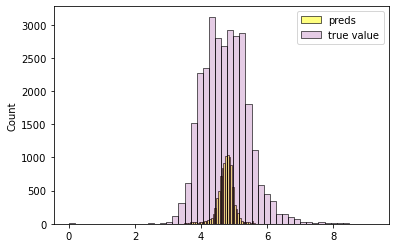

In [449]:
plot_preds(pred_zeros)

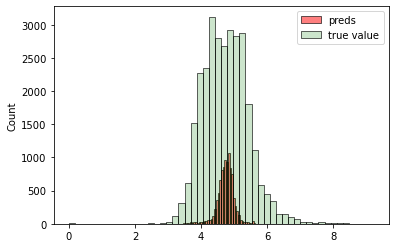

In [450]:
plot_preds(pred_mean, colors=['red', 'green'])

### RMSE against Validation set

In [451]:
rmse_zeros = round(rmse(val_target, pred_zeros),2)
rmse_zeros

0.65

In [452]:
rmse_mean = round(rmse(val_target, pred_mean),2)
rmse_mean

0.65

### Linear Regression with Regularization

In [453]:
def train_linear_regression_reg(X, y, reg=0.001):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX = XTX + reg * np.eye(XTX.shape[0])

    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

## Question 4 

- Now let's train a regularized linear regression.
- For this question, fill the NAs with 0.
- Try different values of r from this list: [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10].
- Use RMSE to evaluate the model on the validation dataset.
- Round the RMSE scores to 2 decimal digits.
- Which r gives the best RMSE?
- If there are multiple options, select the smallest r.

In [454]:
regularizers = [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]

In [455]:
rmses = []

data_x = prepare_data(train_data)
X_val = prepare_data(val_data)

for reg in regularizers:
    w0, w = train_linear_regression_reg(data_x, train_target, reg)
    y_pred = w0 + X_val.dot(w)
    score = rmse(val_target, y_pred)
    print(reg, w0, score)
    rmses.append(score)

0 -419.9126587294166 0.6536337650109637
1e-06 -419.86271567365685 0.6536338934051975
0.0001 -414.9764924320767 0.6536517932422341
0.001 -375.2736527030569 0.6541885180187668
0.01 -191.78384053247194 0.6656175809541837
0.1 -32.562560552266376 0.6869575817280617
1 -3.4992168377292114 0.6919185299169958
5 -0.7033623160382082 0.6923850940160297
10 -0.35127675916757595 0.692422437010339


In [456]:
rmses

[0.6536337650109637,
 0.6536338934051975,
 0.6536517932422341,
 0.6541885180187668,
 0.6656175809541837,
 0.6869575817280617,
 0.6919185299169958,
 0.6923850940160297,
 0.692422437010339]

In [457]:
a = np.array(rmses) 
rmse_min = regularizers[np.where(a == a.min())[0][0]]
print(f"Smallest r={rmse_min}")

Smallest r=0


## Question 5

- We used seed 42 for splitting the data. Let's find out how selecting the seed influences our score.
- Try different seed values: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9].
- For each seed, do the train/validation/test split with 60%/20%/20% distribution.
- Fill the missing values with 0 and train a model without regularization.
- For each seed, evaluate the model on the validation dataset and collect the RMSE scores.
- What's the standard deviation of all the scores? To compute the standard deviation, use np.std.
- Round the result to 3 decimal digits (round(std, 3))

In [472]:
seeds = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [478]:
def get_rsme(seeds, reg=None, eval_on_test=False):
    rsmes_seeds = []
    for seed in seeds:
        data = nyc_df[features]
        train_data, test_data, val_data = split_data(data,seed)

        # Applying log1p to Price variable
        train_target = np.log1p(train_data.price.values)
        test_target = np.log1p(test_data.price.values)
        val_target = np.log1p(val_data.price.values)

        # Drop the target column
        train_data = train_data.drop(columns=[target], axis=1)
        test_data = test_data.drop(columns=[target], axis=1)
        val_data = val_data.drop(columns=[target], axis=1)

        data_x = prepare_data(train_data)
        X_val = prepare_data(val_data)
        X_test = prepare_data(test_data)

        if reg is None:
            pred = fit_and_get_preds(data_x, train_target, X_val)
            score = rmse(val_target, pred)
        else:
            w0, w = train_linear_regression_reg(data_x, train_target, reg)
            if eval_on_test:
                y_pred = w0 + X_test.dot(w)
                score = rmse(test_target, y_pred)
            else:
                y_pred = w0 + X_val.dot(w)
                score = rmse(val_target, y_pred)
        rsmes_seeds.append(score)
    return rsmes_seeds

In [479]:
get_rsme(seeds)

[0.6304569982356334,
 0.6486723821198274,
 0.6409503261267714,
 0.6396698468010863,
 0.6555733449021321,
 0.6391858794559896,
 0.6473543640426384,
 0.6558892183501523,
 0.6405135568809374,
 0.6450366766938797]

In [480]:
std_rsme = round(np.std(rsmes_seeds),3)
print(f"RSME STD:{std_rsme}")

RSME STD:0.007


## Question 6

- Split the dataset like previously, use seed 9.
- Combine train and validation datasets.
- Fill the missing values with 0 and train a model with r=0.001.
- What's the RMSE on the test dataset?

In [486]:
rsme_seed_9 = get_rsme([9], reg=0.001, eval_on_test=True)[0]
print(f"RSME with Seed 9 and reg 0.001 is equal to: {rsme_seed_9}")

RSME with Seed 9 and reg 0.001 is equal to: 0.6439824310380854
